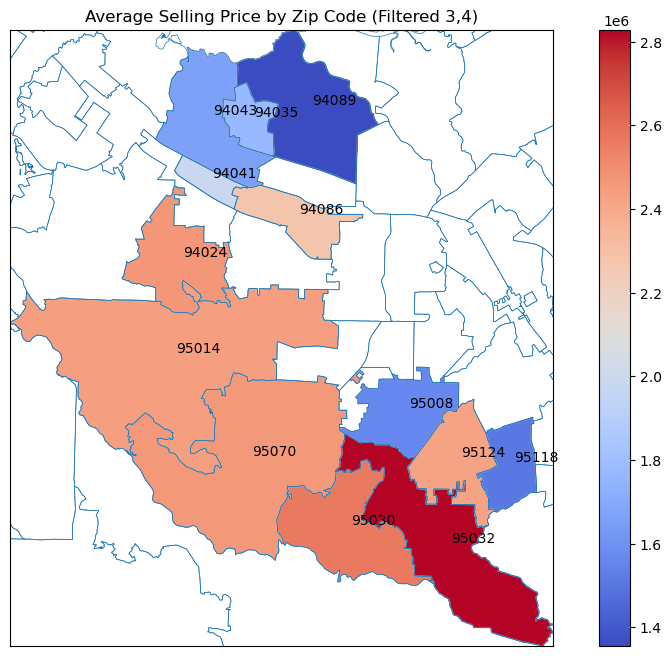

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

sc_df = pd.read_excel('cleaned_data2.xlsx')
#sc_df['Zipcode'] = sc_df['Zipcode'].astype(int).astype(str)

# Group the DataFrame by "ZipCode" and calculate the average selling price for each zip code
sc_df_filtered = sc_df[(sc_df["Beds"] == 3) | (sc_df["Beds"] == 4)]

#avg_selling_price_by_zip = sc_df.groupby("Zipcode")["Selling_Price"].mean().reset_index()
avg_selling_price_by_zip = sc_df_filtered.groupby("Zipcode")["Selling_Price"].mean().reset_index()

zip_code_shapes = gpd.read_file('/Users/monooprasad/Documents/BAN612/BAN612_Project/California_Zip_Codes/California_Zip_Codes.shp')
zip_code_shapes['ZIP_CODE'] = zip_code_shapes['ZIP_CODE'].astype(str)  # Convert the column to string
zip_codes_to_display=['94023', '94024', '94035', '94039', '94040', '94041', '94042', '94043', '94085', '94086', '94088', '94089', '94301', 
                      '94302', '94303', '94306', '94309', 
                      '95002', '95008', '95009', '95011', '95014',
                      '95015', '95030', '95031', '95032', '95033', '95070', '95071', '95118', '95124']

# Merge the average selling price data with the shapefile data using the "ZipCode" field
avg_selling_price_by_zip['Zipcode'] = avg_selling_price_by_zip['Zipcode'].astype(str)
merged_data = zip_code_shapes.merge(avg_selling_price_by_zip, left_on='ZIP_CODE', right_on='Zipcode', how='left')

# Create a plot
fig, ax = plt.subplots(1, figsize=(12, 8))

# Filter merged_data to include only the zip codes in your list
merged_data_filtered = merged_data[merged_data['Zipcode'].isin(zip_codes_to_display)]

# Calculate the bounding box of the filtered zip codes
bbox = merged_data_filtered.total_bounds  # Returns [minx, miny, maxx, maxy]

# Set the extent of the plot to cover the bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Plot the zip code boundaries
zip_code_shapes.boundary.plot(ax=ax, linewidth=0.5)

# Plot the average selling price data for the filtered zip codes
merged_data_filtered.plot(column='Selling_Price', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each zip code on the plot
for x, y, label in zip(merged_data_filtered.geometry.centroid.x, merged_data_filtered.geometry.centroid.y, merged_data_filtered['Zipcode']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, color='black')

# Set plot title and labels
plt.title("Average Selling Price by Zip Code (Filtered 3,4)")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Show the plot
plt.show()



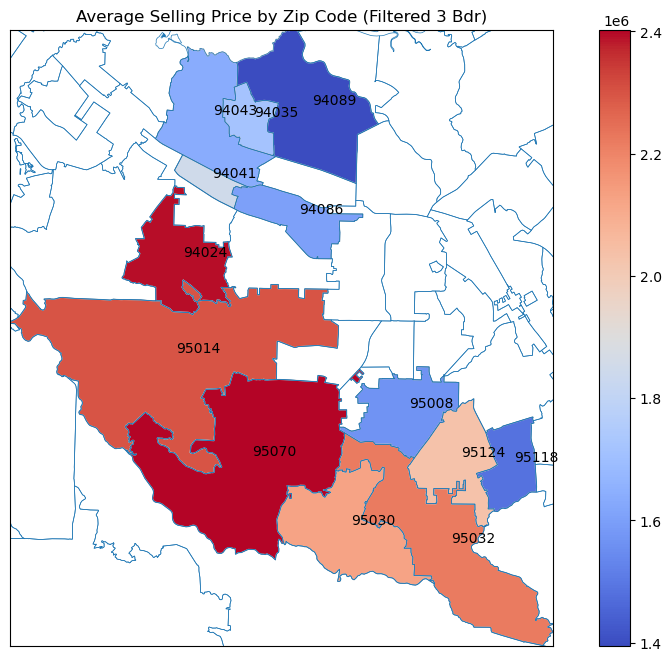

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame (replace 'your_data.csv' with your actual data file)
# sc_df = pd.read_csv('your_data.csv')

# Group the DataFrame by "ZipCode" and calculate the average selling price for each zip code
sc_df_filtered = sc_df[(sc_df["Beds"] == 3)]

#avg_selling_price_by_zip = sc_df.groupby("Zipcode")["Selling_Price"].mean().reset_index()
avg_selling_price_by_zip = sc_df_filtered.groupby("Zipcode")["Selling_Price"].mean().reset_index()

# Load the shapefile containing zip code boundaries
zip_code_shapes = gpd.read_file('/Users/monooprasad/Documents/BAN612/BAN612_Project/California_Zip_Codes/California_Zip_Codes.shp')
zip_code_shapes['ZIP_CODE'] = zip_code_shapes['ZIP_CODE'].astype(str)  # Convert the column to string
zip_codes_to_display=['94023', '94024', '94035', '94039', '94040', '94041', '94042', '94043', '94085', '94086', '94088', '94089', '94301', 
                      '94302', '94303', '94306', '94309', 
                      '95002', '95008', '95009', '95011', '95014',
                      '95015', '95030', '95031', '95032', '95033', '95070', '95071', '95118', '95124']

# Merge the average selling price data with the shapefile data using the "ZipCode" field
avg_selling_price_by_zip['Zipcode'] = avg_selling_price_by_zip['Zipcode'].astype(str)
merged_data = zip_code_shapes.merge(avg_selling_price_by_zip, left_on='ZIP_CODE', right_on='Zipcode', how='left')

# Create a plot
fig, ax = plt.subplots(1, figsize=(12, 8))

# Filter merged_data to include only the zip codes in your list
merged_data_filtered = merged_data[merged_data['Zipcode'].isin(zip_codes_to_display)]

# Calculate the bounding box of the filtered zip codes
bbox = merged_data_filtered.total_bounds  # Returns [minx, miny, maxx, maxy]

# Set the extent of the plot to cover the bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Plot the zip code boundaries
zip_code_shapes.boundary.plot(ax=ax, linewidth=0.5)

# Plot the average selling price data for the filtered zip codes
merged_data_filtered.plot(column='Selling_Price', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each zip code on the plot
for x, y, label in zip(merged_data_filtered.geometry.centroid.x, merged_data_filtered.geometry.centroid.y, merged_data_filtered['Zipcode']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, color='black')

# Set plot title and labels
plt.title("Average Selling Price by Zip Code (Filtered 3 Bdr)")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Show the plot
plt.show()

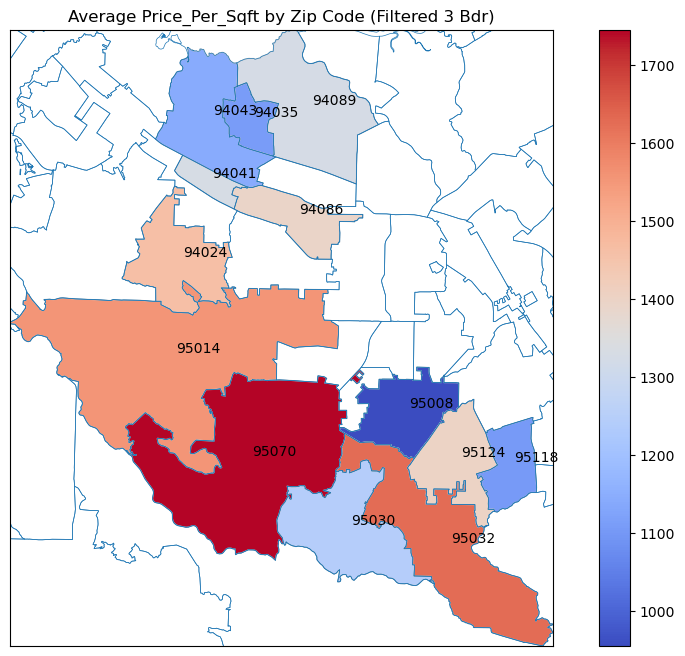

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame (replace 'your_data.csv' with your actual data file)
# sc_df = pd.read_csv('your_data.csv')

# Group the DataFrame by "ZipCode" and calculate the average selling price for each zip code
sc_df_filtered = sc_df[(sc_df["Beds"] == 3)]

#avg_selling_price_by_zip = sc_df.groupby("Zipcode")["Selling_Price"].mean().reset_index()
avg_selling_price_by_zip = sc_df_filtered.groupby("Zipcode")["Price_Per_Sqft"].mean().reset_index()

# Load the shapefile containing zip code boundaries
zip_code_shapes = gpd.read_file('/Users/monooprasad/Documents/BAN612/BAN612_Project/California_Zip_Codes/California_Zip_Codes.shp')
zip_code_shapes['ZIP_CODE'] = zip_code_shapes['ZIP_CODE'].astype(str)  # Convert the column to string
zip_codes_to_display=['94023', '94024', '94035', '94039', '94040', '94041', '94042', '94043', '94085', '94086', '94088', '94089', '94301', 
                      '94302', '94303', '94306', '94309', 
                      '95002', '95008', '95009', '95011', '95014',
                      '95015', '95030', '95031', '95032', '95033', '95070', '95071', '95118', '95124']

# Merge the average selling price data with the shapefile data using the "ZipCode" field
avg_selling_price_by_zip['Zipcode'] = avg_selling_price_by_zip['Zipcode'].astype(str)
merged_data = zip_code_shapes.merge(avg_selling_price_by_zip, left_on='ZIP_CODE', right_on='Zipcode', how='left')

# Create a plot
fig, ax = plt.subplots(1, figsize=(12, 8))

# Filter merged_data to include only the zip codes in your list
merged_data_filtered = merged_data[merged_data['Zipcode'].isin(zip_codes_to_display)]

# Calculate the bounding box of the filtered zip codes
bbox = merged_data_filtered.total_bounds  # Returns [minx, miny, maxx, maxy]

# Set the extent of the plot to cover the bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Plot the zip code boundaries
zip_code_shapes.boundary.plot(ax=ax, linewidth=0.5)

# Plot the average selling price data for the filtered zip codes
merged_data_filtered.plot(column='Price_Per_Sqft', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each zip code on the plot
for x, y, label in zip(merged_data_filtered.geometry.centroid.x, merged_data_filtered.geometry.centroid.y, merged_data_filtered['Zipcode']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, color='black')

# Set plot title and labels
plt.title("Average Price_Per_Sqft by Zip Code (Filtered 3 Bdr)")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Show the plot
plt.show()

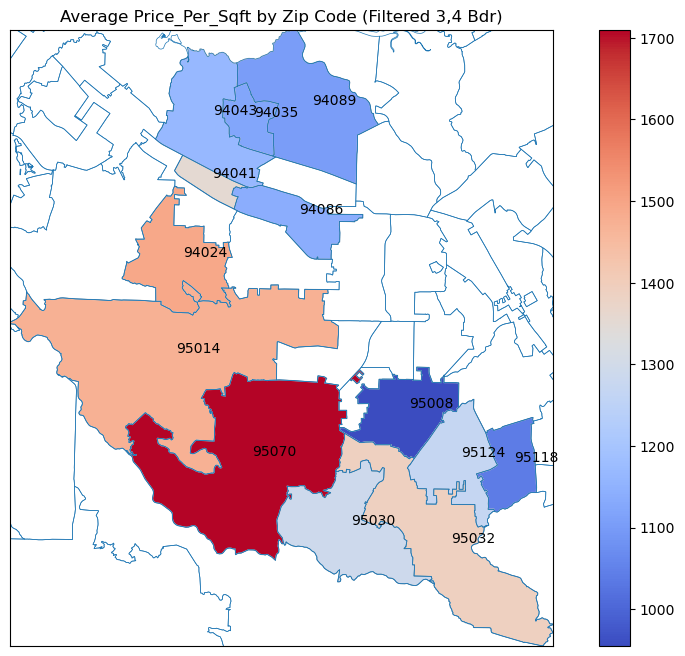

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame (replace 'your_data.csv' with your actual data file)
# sc_df = pd.read_csv('your_data.csv')

# Group the DataFrame by "ZipCode" and calculate the average selling price for each zip code
sc_df_filtered = sc_df[((sc_df["Beds"] == 3) | (sc_df["Beds"] == 4))]

#avg_selling_price_by_zip = sc_df.groupby("Zipcode")["Selling_Price"].mean().reset_index()
avg_selling_price_by_zip = sc_df_filtered.groupby("Zipcode")["Price_Per_Sqft"].mean().reset_index()

# Load the shapefile containing zip code boundaries
zip_code_shapes = gpd.read_file('/Users/monooprasad/Documents/BAN612/BAN612_Project/California_Zip_Codes/California_Zip_Codes.shp')
zip_code_shapes['ZIP_CODE'] = zip_code_shapes['ZIP_CODE'].astype(str)  # Convert the column to string
zip_codes_to_display=['94023', '94024', '94035', '94039', '94040', '94041', '94042', '94043', '94085', '94086', '94088', '94089', '94301', 
                      '94302', '94303', '94306', '94309', 
                      '95002', '95008', '95009', '95011', '95014',
                      '95015', '95030', '95031', '95032', '95033', '95070', '95071', '95118', '95124']

# Merge the average selling price data with the shapefile data using the "ZipCode" field
avg_selling_price_by_zip['Zipcode'] = avg_selling_price_by_zip['Zipcode'].astype(str)
merged_data = zip_code_shapes.merge(avg_selling_price_by_zip, left_on='ZIP_CODE', right_on='Zipcode', how='left')

# Create a plot
fig, ax = plt.subplots(1, figsize=(12, 8))

# Filter merged_data to include only the zip codes in your list
merged_data_filtered = merged_data[merged_data['Zipcode'].isin(zip_codes_to_display)]

# Calculate the bounding box of the filtered zip codes
bbox = merged_data_filtered.total_bounds  # Returns [minx, miny, maxx, maxy]

# Set the extent of the plot to cover the bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Plot the zip code boundaries
zip_code_shapes.boundary.plot(ax=ax, linewidth=0.5)

# Plot the average selling price data for the filtered zip codes
merged_data_filtered.plot(column='Price_Per_Sqft', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each zip code on the plot
for x, y, label in zip(merged_data_filtered.geometry.centroid.x, merged_data_filtered.geometry.centroid.y, merged_data_filtered['Zipcode']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, color='black')

# Set plot title and labels
plt.title("Average Price_Per_Sqft by Zip Code (Filtered 3,4 Bdr)")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Show the plot
plt.show()

In [1]:
import pandas as pd

# Assuming you have already loaded your DataFrame
sc_df = pd.read_excel('cleaned_data2.xlsx')

sc_df_filtered = sc_df[sc_df["Beds"] == 3]

# Group the filtered DataFrame by "Company_Adj" and calculate the average "Price_Per_Sqft" for each group
avg_sales_by_company = sc_df_filtered.groupby("Company_Adj")["Price_Per_Sqft"].mean()

avg_sales_by_company_df = pd.DataFrame({'Average Price_Per_Sqft': avg_sales_by_company.map('${:.2f}'.format)})

# Display the DataFrame
display(avg_sales_by_company_df)

# Calculate the percentage difference between 'Company' and 'Company_Adj' for specific companies
companies_to_compare = ['Apple', 'Alphabet', 'Netflix']

for company in companies_to_compare:
    company_avg_price = float(avg_sales_by_company_df.loc[company]['Average Price_Per_Sqft'].replace('$', '').replace(',', ''))
    company_adj_avg_price = float(avg_sales_by_company_df.loc[company + '_Adj']['Average Price_Per_Sqft'].replace('$', '').replace(',', ''))

    percentage_difference = ((company_avg_price - company_adj_avg_price) / company_avg_price) * 100

    print(f'Percentage Difference between {company} and {company}_Adj: {percentage_difference:.2f}%')


,Average Price_Per_Sqft
Company_Adj,
Alphabet,$1141.73
Alphabet_Adj,$1249.65
Apple,$1554.12
Apple_Adj,$1639.06
Netflix,$1628.00
Netflix_Adj,$1237.44


Percentage Difference between Apple and Apple_Adj: -5.47%
Percentage Difference between Alphabet and Alphabet_Adj: -9.45%
Percentage Difference between Netflix and Netflix_Adj: 23.99%


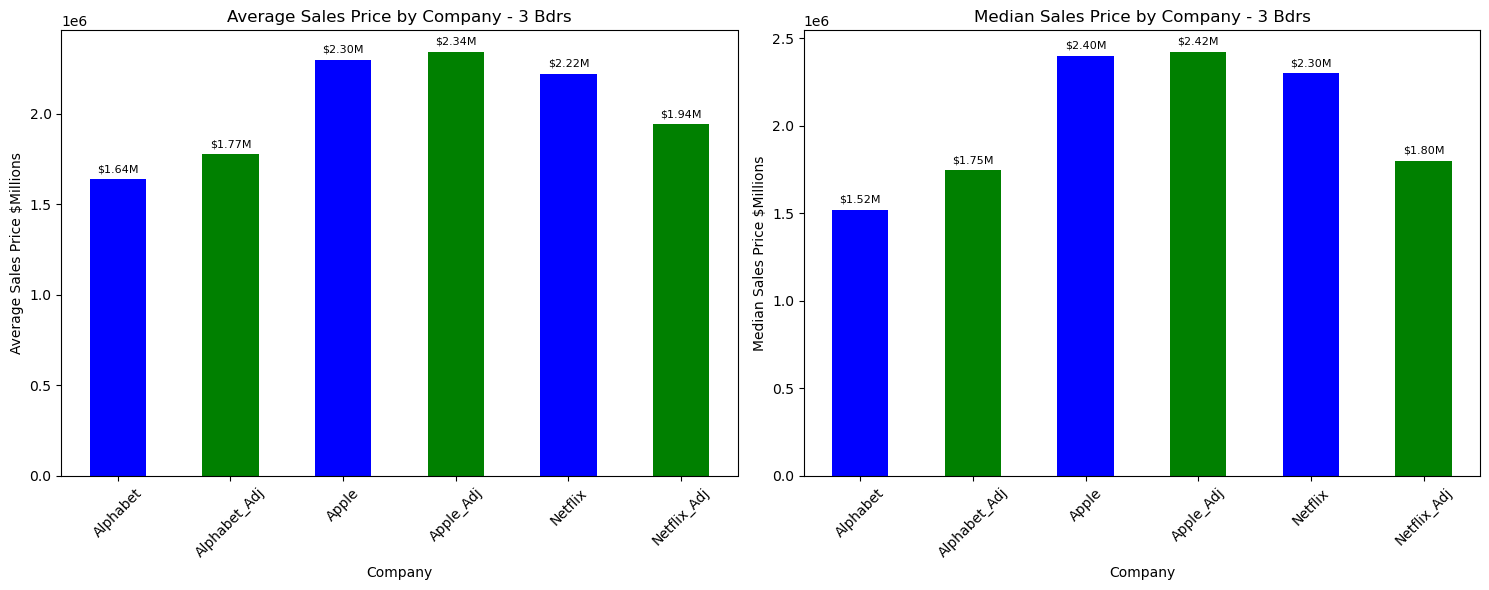

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame
sc_df = pd.read_excel('cleaned_data2.xlsx')
sc_df_filtered = sc_df[(sc_df["Beds"] == 3)]

# Group the DataFrame by "Company_Adj" and calculate the average and median sales price for each group
avg_sales_by_company = sc_df_filtered.groupby("Company_Adj")["Selling_Price"].mean()
median_sales_by_company = sc_df_filtered.groupby("Company_Adj")["Selling_Price"].median()

# Create a list of colors (blue and green) to use for the bars
colors = ['blue', 'green'] * ((len(avg_sales_by_company) // 2) + 1)

# Create a figure with two subplots (one for mean, one for median)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the average sales price
avg_sales_by_company.plot(kind="bar", color=colors, ax=ax1)
ax1.set_title("Average Sales Price by Company - 3 Bdrs")
ax1.set_xlabel("Company")
ax1.set_ylabel("Average Sales Price $Millions")
ax1.set_xticklabels(avg_sales_by_company.index, rotation=45)

# Add labels to each data point on the average sales price plot
for idx, value in enumerate(avg_sales_by_company):
    formatted_value = "${:.2f}M".format(value / 1000000)
    ax1.annotate(formatted_value, (idx, value), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Plot the median sales price
median_sales_by_company.plot(kind="bar", color=colors, ax=ax2)
ax2.set_title("Median Sales Price by Company - 3 Bdrs")
ax2.set_xlabel("Company")
ax2.set_ylabel("Median Sales Price $Millions")
ax2.set_xticklabels(median_sales_by_company.index, rotation=45)

# Add labels to each data point on the median sales price plot
for idx, value in enumerate(median_sales_by_company):
    formatted_value = "${:.2f}M".format(value / 1000000)
    ax2.annotate(formatted_value, (idx, value), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



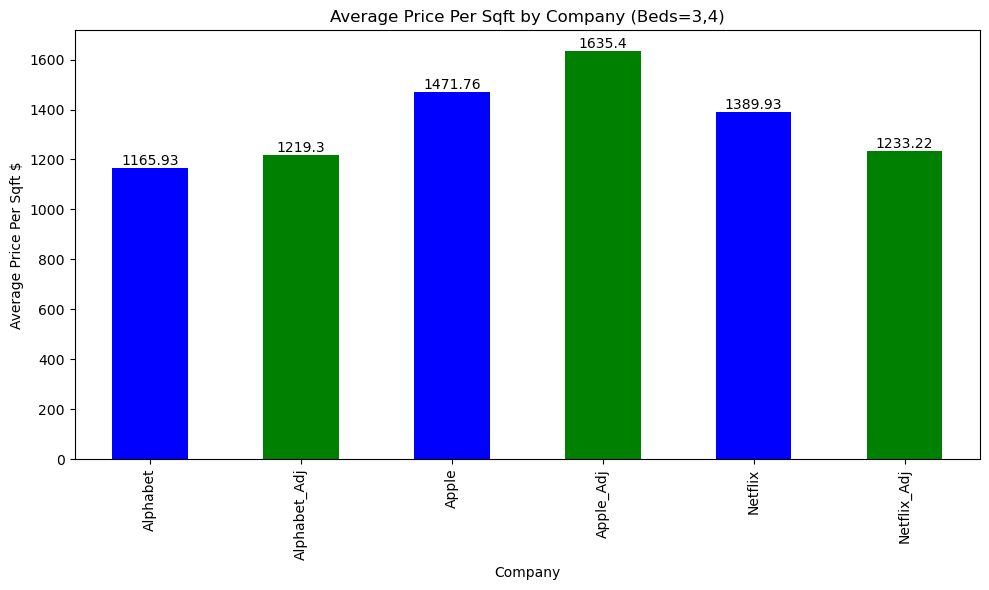

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame
# sc_df = pd.read_excel('cleaned_data.xlsx')

# Filter the DataFrame to only include rows where "Beds" equals 3
# sc_df_filtered = sc_df[ sc_df["Beds"] == 3] 

sc_df_filtered = sc_df[(sc_df["Beds"] == 3) | (sc_df["Beds"] == 4)]
 
# Group the filtered DataFrame by "Company_Adj" and calculate the average sales price for each group
avg_sales_by_company = sc_df_filtered.groupby("Company_Adj")["Price_Per_Sqft"].mean()

# Create a new DataFrame to capture the values by "Company_Adj"
avg_price_per_sqft_df = pd.DataFrame({"Company_Adj": avg_sales_by_company.index, "Avg_Price_Per_Sqft": avg_sales_by_company.values})
colors = ['blue', 'green'] * ((len(avg_sales_by_company) // 2) + 1)

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = avg_sales_by_company.plot(kind="bar", color=colors)
#plt.title("Average Price Per Sqft by Company (Beds=3)")
plt.title("Average Price Per Sqft by Company (Beds=3,4)")
plt.xlabel("Company")
plt.ylabel("Average Price Per Sqft $")

# Add labels to the bars
for bar, label in zip(bars.patches, avg_sales_by_company.round(2).astype(str)):
    height = bar.get_height()
    plt.annotate(label, (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

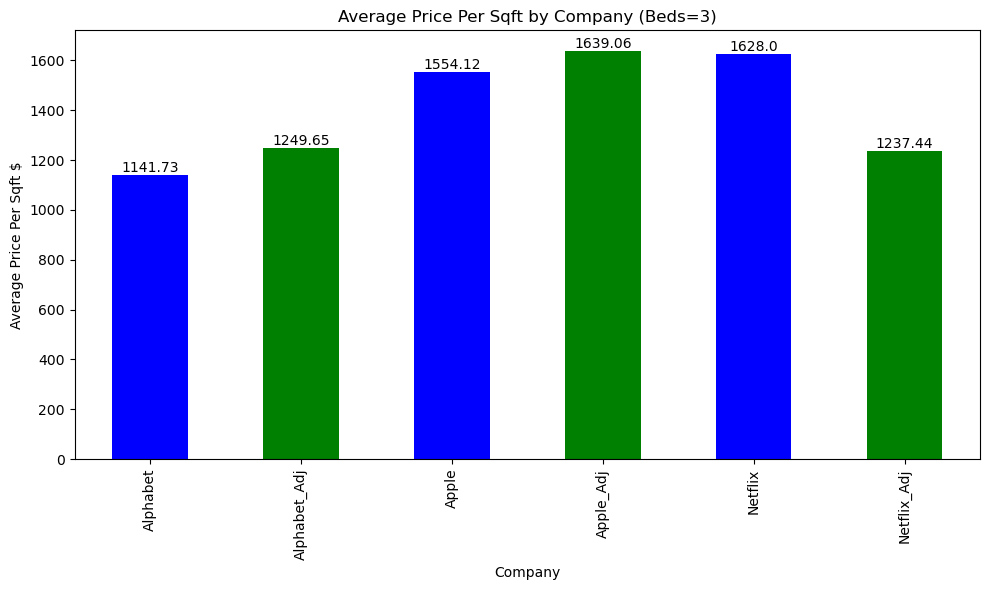

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame
# sc_df = pd.read_excel('cleaned_data.xlsx')

# Filter the DataFrame to only include rows where "Beds" equals 3
# sc_df_filtered = sc_df[ sc_df["Beds"] == 3] 

sc_df_filtered = sc_df[(sc_df["Beds"] == 3)]
 
# Group the filtered DataFrame by "Company_Adj" and calculate the average sales price for each group
avg_sales_by_company = sc_df_filtered.groupby("Company_Adj")["Price_Per_Sqft"].mean()

# Create a new DataFrame to capture the values by "Company_Adj"
avg_price_per_sqft_df = pd.DataFrame({"Company_Adj": avg_sales_by_company.index, "Avg_Price_Per_Sqft": avg_sales_by_company.values})
colors = ['blue', 'green'] * ((len(avg_sales_by_company) // 2) + 1)

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = avg_sales_by_company.plot(kind="bar", color=colors)
#plt.title("Average Price Per Sqft by Company (Beds=3)")
plt.title("Average Price Per Sqft by Company (Beds=3)")
plt.xlabel("Company")
plt.ylabel("Average Price Per Sqft $")

# Add labels to the bars
for bar, label in zip(bars.patches, avg_sales_by_company.round(2).astype(str)):
    height = bar.get_height()
    plt.annotate(label, (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()